#World Happiness

Some really interesting features are contained in these data sets.
It would be interesting to see how these features relate to our day to day lives.

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn # data visualization
from matplotlib import pyplot as plt
#import plotly.plotly as py
#import plotly.tools as tls


sn.set(color_codes = True, style="white")
import matplotlib.pyplot as ml # data visualisation as well
import warnings
warnings.filterwarnings("ignore")
stats17 = pd.read_csv("2017.csv", sep=",", header=0)
stats16 = pd.read_csv("2016.csv", sep=",", header=0)
stats15 = pd.read_csv("2015.csv", sep=",", header=0)

## Exploration

In [7]:
stats16.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [14]:
stats16.head()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [15]:
stats16.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We see what our data set looks  like.
We also conducted a summary to get a rough idea if we are missing anything, which we can see that we dont.

After having a look at the head we can see the top countries are in Europe. we need to see if this hunch carries.

### Region

In [ ]:
Lets see how many countries we have in each region

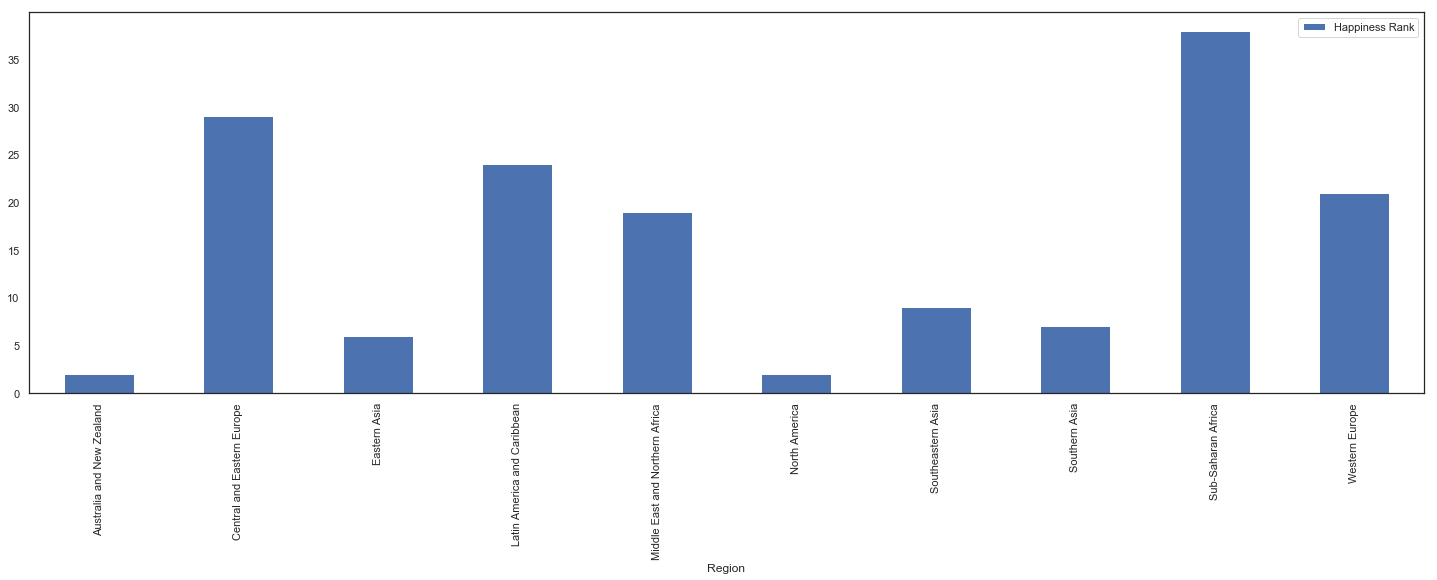

In [20]:
stats16.groupby('Region').agg('count')[['Happiness Rank']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['b', 'tab:pink']);

We can see that Africa and Central and Eastern Europe have the highest numder of countries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

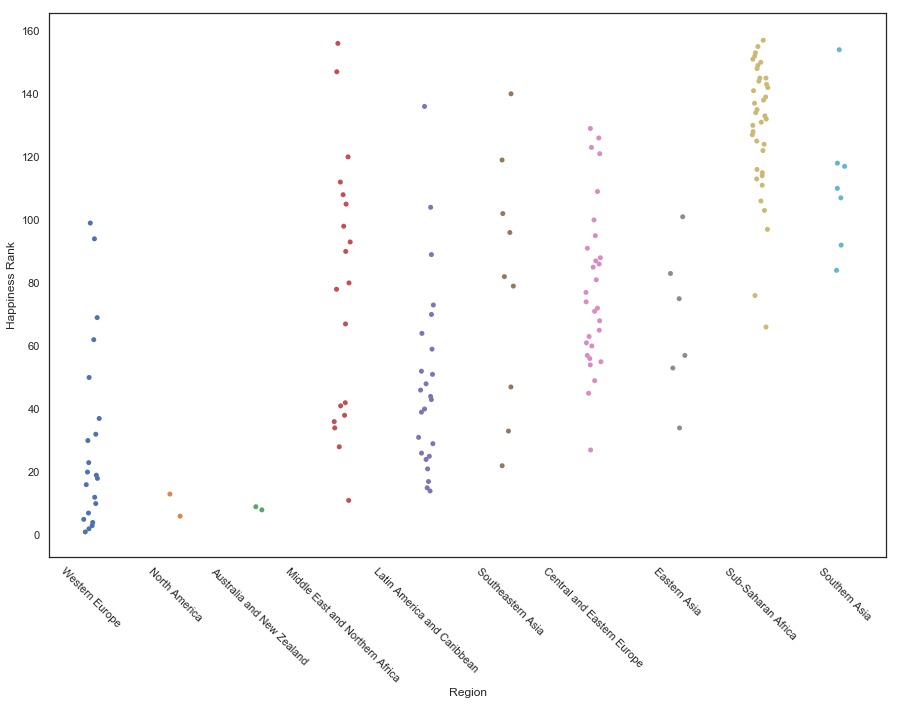

In [31]:
ml.figure(figsize=(15,10)) 
sn.stripplot(x="Region", y="Happiness Rank", data=stats16, jitter=True)
ml.xticks(rotation=-45)

We can see that Africa has the highest mean, with Australia/New Zealand and North America having the lowest.
We must remember that Australia/New Zealand and North America have 2 countries each and that with these 2 regions the means do not really mean much.

We need to see if our data set has any features that correlate to each other.

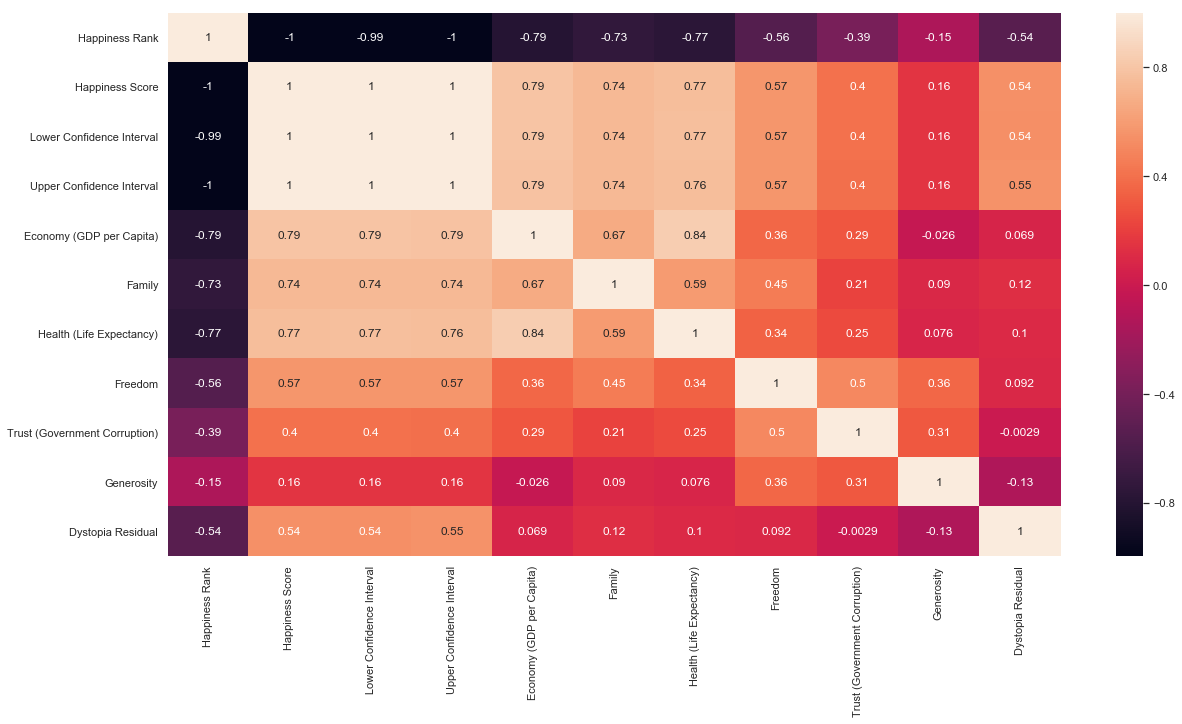

In [29]:
ml.figure(figsize=(20,10)) 
sn.heatmap(stats16.corr(), annot=True)

There is a high correlation between Economy and Happiness score. Life Expectancy and Economy.
There is also a moderate correlation between Freedom and government trust.

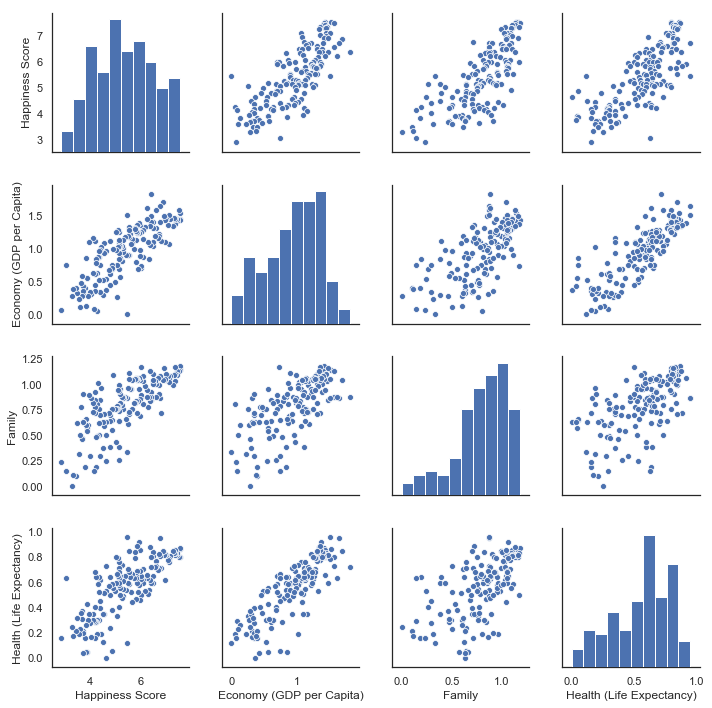

In [32]:
sn.pairplot(stats16[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']])